In [1]:
import numpy
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 20)


In [2]:
data=pd.read_excel("./Data/Data DS Cotton Plus.xlsx", sheet_name="BD")
data.shape

(9976, 40)

Elimino los datos que no tienen un valor analitico, como el numero de la cedula por ejemplo, tambien elimino las casillas con datos nulos que se encotraron en el trabajo anterior, siendo en general todos los que implican datos personales.

In [3]:
data.drop(["Cedula","Tipo de Contacto","Fecha Nacimiento","Mes Nacimiento","Dia Nacimiento","Direccion Valido?",
            "Telefono Movil", "TelefonoOficina", "Telefono Casa", "Mail", "Direccion"], axis = 1, inplace = True)

In [4]:
data.drop(["Mail Valido?","Tel Ofc Valid?","Tel Casa Valido?","Cel Valido?","Estado Civil"], axis=1, inplace= True)
data.dropna()

,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Es Contactable,Ciudad de Residencia,...,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,Nombre Cliente 4866,Adictos,Si,Si,9231860,92,1118440,12,Si,BOGOTA,...,1,301,0,0,0,0,0,31004180,0,0
1,Nombre Cliente 3636,Adictos,Si,No,8128300,85,0,0,Si,MEDELLIN,...,3,159,0,0,0,0,0,0,0,0
2,Nombre Cliente 2941,Adictos,Si,Si,7114260,75,242500,5,Si,MEDELLIN,...,0,101,0,0,0,0,0,0,0,0
3,Nombre Cliente 4520,Adictos,Si,Si,6782600,74,415700,3,Si,ENVIGADO,...,2,100,0,0,0,0,0,0,0,0
4,Nombre Cliente 2740,Adictos,Si,Si,6925350,68,792080,8,Si,CALI,...,1,76,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,Nombre Cliente 9955,Esporádicos,No,No,0,0,0,0,Si,BUCARAMANGA,...,20,1,0,0,0,0,0,0,0,0
9972,Nombre Cliente 9961,Esporádicos,No,No,0,0,0,0,Si,BUCARAMANGA,...,15,1,0,0,0,0,0,0,0,0
9973,Nombre Cliente 9962,Aficionados,No,No,0,0,0,0,Si,CUCUTA,...,15,9,0,0,0,0,0,0,0,0
9974,Nombre Cliente 9966,Esporádicos,No,No,0,0,0,0,Si,PEREIRA,...,18,1,0,0,0,0,107900,0,0,0


Para el Analisis RFM tenemos la columna "Segmento" que le otorga una etiqueta a cada uno de los clientes.
las cuales son las siguientes


In [5]:
clientes = data["Segmento"].value_counts()
listados=list(dict(clientes))
listados
elementos=["Recencia (Tiempo transcurrido en semanas desde su ultima compra)","Frecuencia (Cantidad items comprados)","Monto Comprado 2020"]
listados


['Aficionados', 'Esporádicos', 'Inactivo', 'Adictos', 'Curiosos']

In [6]:
prueba={}
cosas=pd.DataFrame()
for client in listados:
    datacliente=data.loc[:,"Segmento"]== client
    dfcliente=data.loc[datacliente]
    for element in elementos:
        diclicentes=list(dict(dfcliente[element].value_counts()))
        limrecencia=[min(diclicentes), max(diclicentes)]
        prueba={client:limrecencia}
        print(f"",prueba," ", element)


 {'Aficionados': [0, 22]}   Recencia (Tiempo transcurrido en semanas desde su ultima compra)
 {'Aficionados': [2, 75]}   Frecuencia (Cantidad items comprados)
 {'Aficionados': [0, 1552540]}   Monto Comprado 2020
 {'Esporádicos': [0, 24]}   Recencia (Tiempo transcurrido en semanas desde su ultima compra)
 {'Esporádicos': [1, 7]}   Frecuencia (Cantidad items comprados)
 {'Esporádicos': [0, 207900]}   Monto Comprado 2020
 {'Inactivo': [15, 48]}   Recencia (Tiempo transcurrido en semanas desde su ultima compra)
 {'Inactivo': [1, 10]}   Frecuencia (Cantidad items comprados)
 {'Inactivo': [0, 0]}   Monto Comprado 2020
 {'Adictos': [0, 8]}   Recencia (Tiempo transcurrido en semanas desde su ultima compra)
 {'Adictos': [20, 301]}   Frecuencia (Cantidad items comprados)
 {'Adictos': [0, 6448400]}   Monto Comprado 2020
 {'Curiosos': [3, 39]}   Recencia (Tiempo transcurrido en semanas desde su ultima compra)
 {'Curiosos': [1, 15]}   Frecuencia (Cantidad items comprados)
 {'Curiosos': [0, 0]}   Mo

Con la informacion anterior, se pueden identificar los rangos y patrones de cada uno de los segmentos, se muestra, por ejemplo, como los curiosos no compraron ningun producto durante el ultimo año, al igual que los inactivos, solo que estos ultimos llevan sin acceder a la empresa mas de 15 semanas.

tabien se observa como los adictos no se alejan mas de 8 semanas de la empresa y gastan muchisimo mas dinero que cualquera de los demas segmentos.

ahora analizare el porcentaje de clientes que conforman cada segmento

In [7]:
segmentos=dict(clientes)
x=sum(clientes.values)
for client in listados:
    y=segmentos[client]
    porcentaje=(y*100)/x
    print(f"",client, "reprecenta el ",porcentaje, "% de los clientes")


 Aficionados reprecenta el  68.61467522052926 % de los clientes
 Esporádicos reprecenta el  25.010024057738573 % de los clientes
 Inactivo reprecenta el  2.967121090617482 % de los clientes
 Adictos reprecenta el  1.814354450681636 % de los clientes
 Curiosos reprecenta el  1.5938251804330392 % de los clientes


Podemos observar que el grueso de los clientes son los aficionados con una presencia del 68.61% y los clientes mas fieles solo representan el 1.81% de los compradores.

In [8]:
z=0
cantidad=[]
for client in listados:
    datacliente=data.loc[:,"Segmento"]== client
    dfcliente=data.loc[datacliente]
    diclicentes=list(dict(dfcliente["Monto Comprado 2020"].value_counts()))
    total=sum(diclicentes)
    cantidad.append(total)
    z=z+total
    print(f"Monto total de",total,"aportado por el segmento", client, "durante 2020")




Monto total de 131856301 aportado por el segmento Aficionados durante 2020
Monto total de 2749197 aportado por el segmento Esporádicos durante 2020
Monto total de 0 aportado por el segmento Inactivo durante 2020
Monto total de 70218480 aportado por el segmento Adictos durante 2020
Monto total de 0 aportado por el segmento Curiosos durante 2020


In [9]:
g=0
for t in cantidad:
    g=g+1
    dinero= (t*100)/z
    print(f"los",listados[g-1],"Represental el",dinero,"%","De las ganancias anuales en 2020")

los Aficionados Represental el 64.37542239317312 % De las ganancias anuales en 2020
los Esporádicos Represental el 1.3422241999420594 % De las ganancias anuales en 2020
los Inactivo Represental el 0.0 % De las ganancias anuales en 2020
los Adictos Represental el 34.282353406884816 % De las ganancias anuales en 2020
los Curiosos Represental el 0.0 % De las ganancias anuales en 2020


In [10]:
def hist_boxplot(label = pd.Series):

    fig, axs = plt.subplots(2, 1, figsize = (7, 9))

    axs[0].hist(label, bins = 100)
    axs[0].set_ylabel("Cantidad")
    axs[0].axvline(label.mean(), color = "magenta", linestyle = "dashed", linewidth = 1.5)
    axs[0].axvline(label.median(), color = "cyan", linestyle = "dashed", linewidth = 1.5)

    axs[1].boxplot(label, vert = False)
    axs[1].set_xlabel(i)

    fig.suptitle(i)

En el ejercicio anterior habian muchos datos atipicos de los cuales la mayoria era porque los valores en cero eran demaciados, los valores en cero eran personas que no hacian compras y no llevavan ningun tipo de producto.

Ahora miremos como se ven los mismos datos sin estos valores.

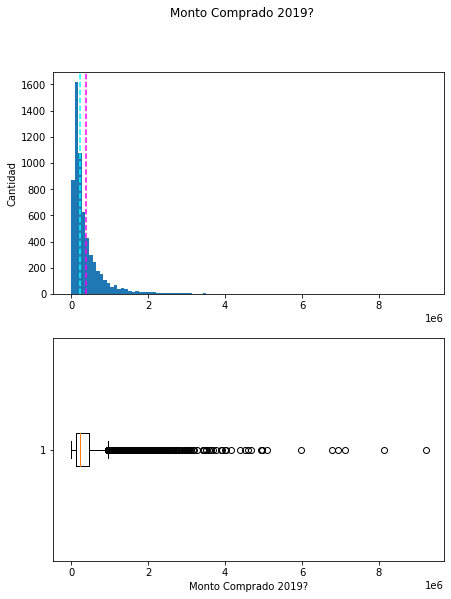

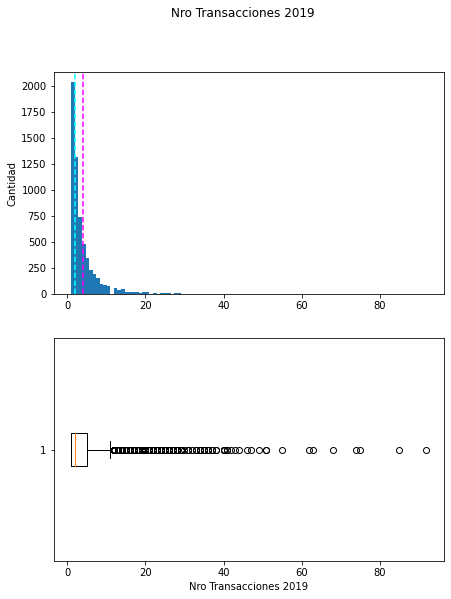

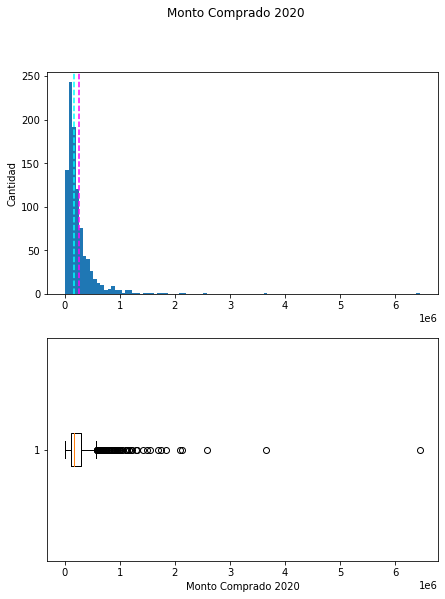

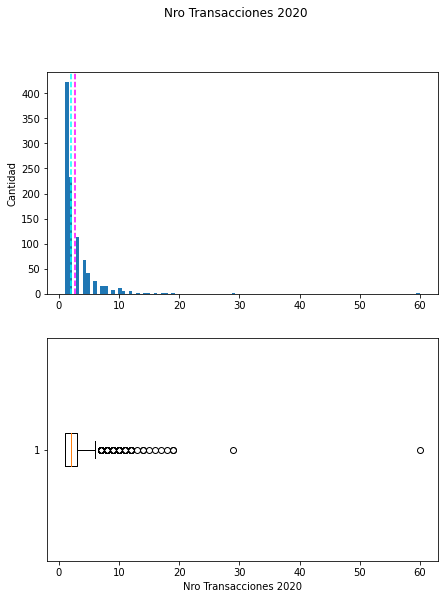

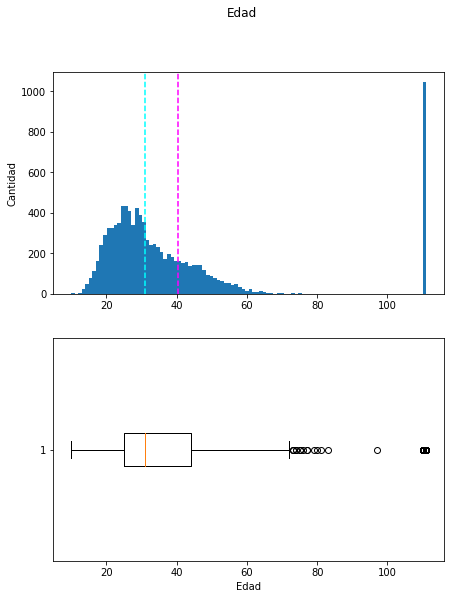

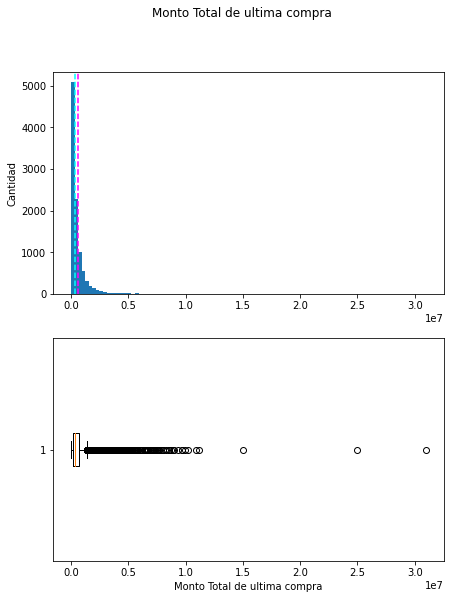

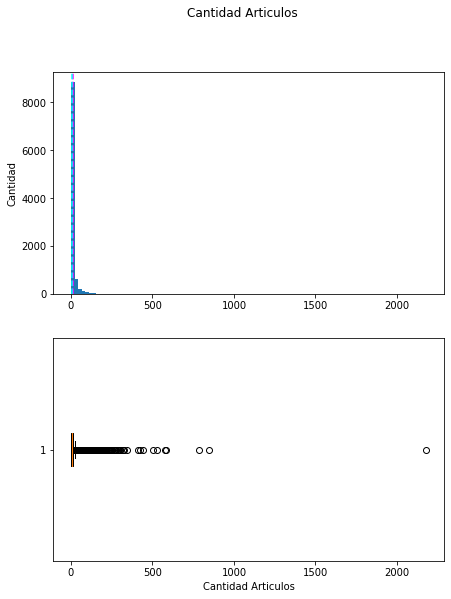

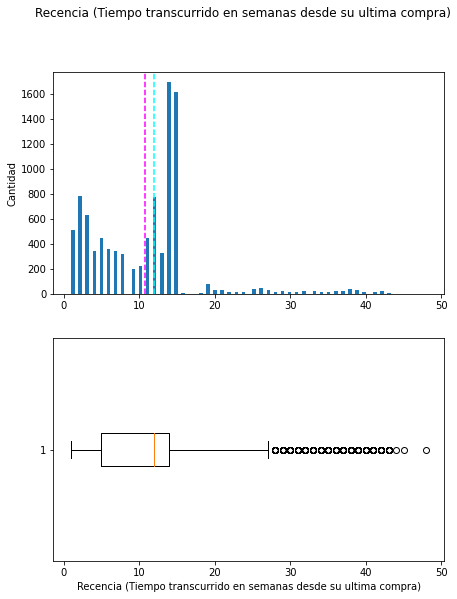

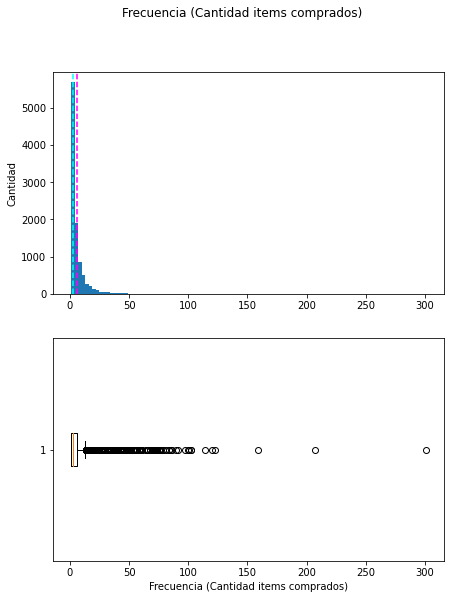

In [11]:
list_feutures = ["Monto Comprado 2019?", "Nro Transacciones 2019", "Monto Comprado 2020", "Nro Transacciones 2020", "Edad",
"Monto Total de ultima compra","Cantidad Articulos","Recencia (Tiempo transcurrido en semanas desde su ultima compra)",
"Frecuencia (Cantidad items comprados)"]
for i in list_feutures:
    datalimpia=data.loc[:,i] != 0
    dflimpia=data.loc[datalimpia]
    hist_boxplot(label = dflimpia[i])

a pesar de que se note una mejoria en la calidad de los datos aun hay muchos valores a tipicos, pero la mayoria de estos no son valores que sea adecuado eliminar, expto por la edad, en la que marca clientes con mas de 100 años, por ello, eliminare los valores superiores a 90

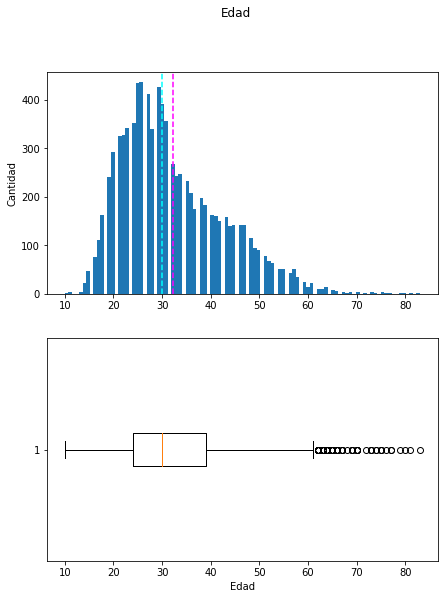

In [12]:
i="Edad"
datalimpia=data.loc[:,i] < 90
dflimpia=data.loc[datalimpia]
hist_boxplot(label = dflimpia[i])

En los modelos mas utilizados en el sector financiero se tiene por ejemplo
La gestion de fraude: Usa herramientas de analisis predictivo, usa datos como patrones en compras, geolocalizacion, datos de transacciones y otros tipos de taods para detectar fraude en tarjetas de credito.

Retencion de clientes: Permite detectar patrones en las acciones de los clientes que permitan saber cuando es probable que se marche o cambie de empresa.

Ofertas personalizadas: Las empresas pueden definir segmentos y dependiendo de los objetos en sus listas de compras o deceados pueden personalizar las ofertas de los diferentes clientes.

Ademas pro ejemplo, el RFM es un metodo que funciona para la segmentacion declientes dependiendo de su Recencia, Frecuencia y Monto total comprado en cierto periodo.



El Churn Rate o la Tasa de cancelacion de clientes hace referencia los usuarios que cancelan algun servicio. Se parecia en los graficos anteriores que lo mas probable es que un cliente que supere las 15 semanas de Recencia sea un cliente perdido.

La manera más sencilla de hacerlo es dividir el número de clientes, entre el número de usuarios que se dan de baja en un periodo determinado.
